## read data & data preprocessing

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_excel("data_for_classification.xlsx")
df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,"[43, 31, 39, 46, 42, 42, 25, 37, 38, 24]","[43, 23, 27, 23, 28, 38, 11, 30, 42, 33]","[29, 13, 42, 39, 49, 43, 27, 40, 19, 30]","[48, 29, 28, 45, 11, 16, 13, 14, 16, 18]","[11, 28, 20, 10, 15, 25, 34, 32, 37, 35]","[19, 50, 37, 33, 23, 49, 22, 29, 25, 34]","[34, 43, 20, 45, 30, 29, 23, 31, 12, 38]","[30, 13, 19, 29, 15, 34, 12, 22, 28, 26]","[21, 16, 41, 16, 34, 49, 24, 51, 51, 17]"
1,"[24, 19, 18, 33, 51, 35, 27, 49, 47, 29, 50, 2...","[50, 20, 27, 42, 44, 30, 39, 23, 39, 19, 33, 4...","[48, 12, 12, 26, 34, 35, 22, 15, 36, 14, 51, 2...","[21, 38, 49, 37, 51, 12, 10, 20, 43, 11, 19, 2...","[16, 16, 43, 30, 10, 22, 41, 36, 13, 34, 32, 4...","[34, 11, 14, 26, 29, 26, 19, 33, 36, 27, 51, 4...","[22, 49, 31, 16, 18, 48, 11, 38, 24, 49, 40, 1...","[42, 13, 45, 39, 25, 10, 27, 18, 27, 44, 11, 3...","[26, 16, 51, 40, 14, 38, 11, 42, 23, 17, 44, 2..."
2,"[41, 34, 37, 10, 12, 10, 18, 27, 19, 21]","[20, 12, 47, 27, 50, 25, 35, 24, 48, 10]","[43, 22, 40, 33, 45, 50, 18, 11, 49, 23]","[18, 27, 29, 24, 10, 22, 47, 40, 23, 31]","[10, 10, 41, 26, 34, 34, 35, 15, 22, 37]","[19, 19, 21, 26, 26, 27, 45, 45, 35, 29]","[18, 12, 30, 28, 46, 17, 23, 50, 45, 24]","[23, 21, 22, 34, 10, 38, 42, 37, 39, 21]","[49, 29, 48, 31, 45, 29, 15, 28, 49, 18]"
3,"[42, 35, 37, 34, 51, 43, 30, 27, 35, 48, 39, 3...","[35, 16, 38, 19, 28, 45, 37, 50, 37, 33, 40, 5...","[16, 16, 49, 21, 26, 37, 18, 26, 29, 21, 32, 3...","[12, 32, 46, 26, 19, 17, 20, 25, 19, 41, 11, 2...","[10, 48, 24, 33, 47, 46, 24, 45, 44, 14, 36, 3...","[19, 48, 34, 17, 28, 29, 18, 46, 29, 15, 22, 3...","[33, 41, 44, 12, 34, 10, 17, 51, 36, 41, 36, 3...","[35, 50, 38, 27, 19, 25, 14, 47, 40, 40, 50, 4...","[14, 25, 36, 44, 32, 50, 14, 31, 21, 41, 17, 3..."
4,"[48, 47, 32, 45, 31]","[23, 11, 51, 37, 14]","[27, 32, 13, 34, 19]","[27, 12, 36, 24, 28]","[38, 30, 36, 13, 32]","[18, 15, 22, 48, 48]","[18, 23, 39, 16, 20]","[22, 14, 48, 15, 16]","[36, 19, 27, 43, 38]"


In [6]:
for i in df.columns:
    df[i] = df[i].apply(eval)

In [7]:
print(df.dtypes)

مرجعية    object
تحليل     object
تصميم     object
برمجة     object
اختبار    object
نتائج     object
تقرير     object
عرض       object
غيتهاب    object
dtype: object


In [8]:
for row_index in range(len(df)):
    for col_index in range(len(df.columns)):
        value = df.iloc[row_index, col_index]
        sum_prod, count = 1, 0
        for i in range(len(value)):
            if value[i] != 0:
                sum_prod *= value[i]
                count += 1
        if count != 0:
            df.iloc[row_index, col_index] = np.ceil(np.power(sum_prod, 1/count))
        else:
            df.iloc[row_index, col_index] = 0
df.head()


,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,36.0,29.0,31.0,21.0,23.0,31.0,29.0,22.0,29.0
1,30.0,35.0,28.0,26.0,27.0,28.0,28.0,25.0,28.0
2,21.0,27.0,31.0,26.0,24.0,28.0,27.0,27.0,32.0
3,33.0,33.0,25.0,22.0,27.0,28.0,27.0,31.0,28.0
4,40.0,24.0,24.0,24.0,28.0,27.0,23.0,21.0,32.0


In [9]:
df["متوسط"]=0

for i in range(len(df)):
    value = df.iloc[i].tolist()
    sum_prod, count = 1, 0
    for j in range(len(value)):
        if value[j] != 0:
            sum_prod *= value[j]
            count += 1
    if count != 0:
        df.loc[i,"متوسط"] = np.ceil(np.power(sum_prod, 1/count))
    else:
        df.loc[i,"متوسط"] = 0
        
df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط
0,36.0,29.0,31.0,21.0,23.0,31.0,29.0,22.0,29.0,28
1,30.0,35.0,28.0,26.0,27.0,28.0,28.0,25.0,28.0,29
2,21.0,27.0,31.0,26.0,24.0,28.0,27.0,27.0,32.0,27
3,33.0,33.0,25.0,22.0,27.0,28.0,27.0,31.0,28.0,29
4,40.0,24.0,24.0,24.0,28.0,27.0,23.0,21.0,32.0,27


In [10]:
df = df.apply(lambda x: x.astype(int))
print(df.dtypes)

مرجعية    int32
تحليل     int32
تصميم     int32
برمجة     int32
اختبار    int32
نتائج     int32
تقرير     int32
عرض       int32
غيتهاب    int32
متوسط     int32
dtype: object


In [11]:
df['تصنيف']=1
for i in range(df['تصنيف'].count()):
    if df.iloc[i,9]<50:
        df.iloc[i,10]="أحمر"
    elif (df.iloc[i,9] >=50) & (df.iloc[i,9]<70):
        df.iloc[i,10]="برتقالي"
    elif (df.iloc[i,9] >=70) :
        df.iloc[i,10]="أخضر"

df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط,تصنيف
0,36,29,31,21,23,31,29,22,29,28,أحمر
1,30,35,28,26,27,28,28,25,28,29,أحمر
2,21,27,31,26,24,28,27,27,32,27,أحمر
3,33,33,25,22,27,28,27,31,28,29,أحمر
4,40,24,24,24,28,27,23,21,32,27,أحمر


In [12]:
df.describe()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,54.337600,54.351600,54.605600,54.466000,54.600000,54.333600,54.550400,54.424000,54.315200,54.656400
std,21.331536,21.424238,21.321592,21.405161,21.467639,21.510913,21.407409,21.416902,21.492097,20.877162
min,18.000000,16.000000,15.000000,17.000000,16.000000,17.000000,16.000000,16.000000,15.000000,25.000000
25%,36.000000,36.000000,36.000000,36.000000,37.000000,35.750000,36.000000,35.000000,35.750000,31.000000
50%,51.000000,51.000000,52.000000,51.000000,52.000000,51.000000,52.000000,51.000000,51.000000,52.000000
75%,80.000000,80.000000,80.000000,80.000000,81.000000,80.000000,80.000000,80.000000,80.000000,84.000000
max,96.000000,94.000000,95.000000,95.000000,96.000000,97.000000,95.000000,96.000000,93.000000,89.000000


In [13]:
print("\nnumber of samples : " , df.count().max())
print(df.columns)


number of samples :  2500
Index(['مرجعية', 'تحليل', 'تصميم', 'برمجة', 'اختبار', 'نتائج', 'تقرير', 'عرض',
       'غيتهاب', 'متوسط', 'تصنيف'],
      dtype='object')


### Duplicate check

In [14]:
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  0


### data embalance check

In [15]:
print("The number of samples in the class 'red' : " , df['تصنيف'][df['تصنيف'] == "أحمر"].count())
print("The number of samples in the class 'orange' : " , df['تصنيف'][df['تصنيف'] == "برتقالي"].count())
print("The number of samples in the class 'green' : " , df['تصنيف'][df['تصنيف'] == "أخضر"].count())

import plotly.express as px

colors = {"red":df['تصنيف'][df['تصنيف'] == "أحمر"].count(), "orange":df['تصنيف'][df['تصنيف'] == "برتقالي"].count(), "green":df['تصنيف'][df['تصنيف'] == "أخضر"].count()}
sorted_colors = dict(sorted(colors.items(), key=lambda x: x[1], reverse=True))

fig = px.pie(values=list(sorted_colors.values()), names=list(sorted_colors.keys()), width=700, height=400, color_discrete_sequence=list(sorted_colors.keys()), title="Marks distribute")

fig.show()

The number of samples in the class 'red' :  848
The number of samples in the class 'orange' :  1002
The number of samples in the class 'green' :  650


### checking for outliers

In [16]:
numerical_columns = list(df.loc[:,['مرجعية', 'تحليل', 'تصميم', 'برمجة', 'اختبار', 'نتائج', 'تقرير', 'عرض','غيتهاب']])

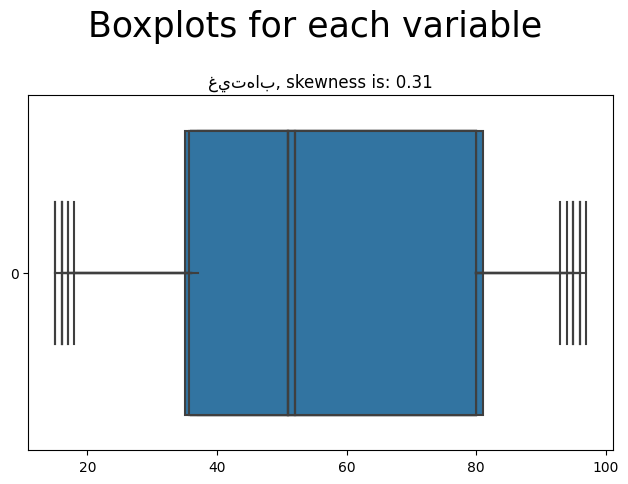

In [17]:
# checking boxplots
fig, axs = plt.subplots(1, 1, sharey=True)
fig.suptitle('Boxplots for each variable', y=1, size=25)

for i, data in enumerate(numerical_columns):
    sns.boxplot(data=df[data], orient='h', ax=axs)
    axs.set_title(data + ', skewness is: ' + str(round(df[data].skew(axis=0, skipna=True), 2)))

plt.tight_layout()

In [18]:
from collections import Counter
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
         # selecting observations containing more than x outliers
        outlier_list = Counter(outlier_list)        
        multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
        
        # Calculate the number of records below and above lower and above bound value respectively
        out1 = df[df[column] < Q1 - outlier_step]
        out2 = df[df[column] > Q3 + outlier_step]
        
        print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
        return multiple_outliers

In [19]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numerical_columns)

# dropping outliers
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [20]:
df.shape

(2500, 11)

### imputaion  missing

In [21]:
df.isna().sum()

مرجعية    0
تحليل     0
تصميم     0
برمجة     0
اختبار    0
نتائج     0
تقرير     0
عرض       0
غيتهاب    0
متوسط     0
تصنيف     0
dtype: int64

### data_split

In [22]:
from sklearn.model_selection import train_test_split

df=df.drop(['متوسط'],axis=1)

x=df.drop(['تصنيف'],axis=1)
y=df['تصنيف']

x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42)
x_train, x_test = x_train.reset_index(drop=True), x_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

## building and evaluation models

### import libraris

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix ,recall_score, precision_score, f1_score, accuracy_score, classification_report
from yellowbrick.classifier import ROCAUC

##############################################################################################

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

##############################################################################################

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##############################################################################################

### confusion matrix

In [24]:
def confusion_matrix_plot(cm):
    classes = ['class 1', 'class 2' , 'class 3' ]
    with np.errstate(divide='ignore', invalid='ignore'):
        cm = cm/np.sum(cm,axis=0)
    tick_marks = np.arange(3)
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                        ha="center", va="center", color="w")
    plt.title('Normalized confusion matrix for model')
    fig.colorbar(im)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes);

### sensitivy and specifity

In [25]:
def sensitivity_specificity(cm):
    sensitivity = []
    specificity = []

    for i in range(len(cm)):
        true_positive = cm[i, i]
        false_positive = cm[:, i].sum() - true_positive
        false_negative = cm[i, :].sum() - true_positive
        true_negative = cm.sum() - (true_positive + false_positive + false_negative)

        sensitivity.append(true_positive / (true_positive + false_negative))
        specificity.append(true_negative / (true_negative + false_positive))

    print("Sensitivity for each class:", sensitivity)
    print("Specificity for each class:", specificity)
    for i in range(len(sensitivity)):
        print("Sensitivity for each class: ",i," is", sensitivity[i])
        print("Specificity for each class:",i," is", specificity[i])

### AUC (ROC PLOT)

In [26]:
def plot_ROC_curve(model, x_train, y_train, x_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={"أحمر": 'أحمر', 
                                        "برتقالي": 'برتقالي', 
                                        "أخضر": 'أخضر',
})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

### plot table score

In [27]:
def table_score(ypred):
    Recall = recall_score(y_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score

### KNN model

In [28]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn1.fit(x_train , y_train)
print("Test score: {:.2f}".format(knn1.score(x_test , y_test)))

Test score: 0.96


In [29]:
param_grid_knn = {
    'n_neighbors': [1, 10 , 100], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean' , 'cosine' , 'manhattan' , 'minkowski']
}
clf_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= param_grid_knn , cv=kfold, scoring='accuracy', verbose=3)
clf_knn.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.971 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.954 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.943 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.949 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.960 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.960 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.937 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': [1, 10, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [30]:
print("Best of Hyper Parameter :" , clf_knn.best_params_, "\nScore : " , clf_knn.best_score_)

Best of Hyper Parameter : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'} 
Score :  0.9457142857142857


In [31]:
knn2 = clf_knn.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(knn2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(knn2.score(x_train, y_train)))

Test score for test_data: 0.95
Test score for train_data: 1.00


In [32]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_clf1 = cross_val_score(knn2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf1)
print("Mean for k_fold cross validation for KNN model", np.mean(scores_clf1))

[0.92       0.95428571 0.97142857 0.95428571 0.93142857 0.92571429
 0.97142857 0.95428571 0.94857143 0.92571429]
Mean for k_fold cross validation for KNN model 0.9457142857142857


In [33]:
ypred1 = knn2.predict(x_test)
cm_knn = confusion_matrix(y_test, ypred1)
print("confusion_matrix(ytest, ypred): \n", cm_knn)

confusion_matrix(ytest, ypred): 
 [[231   0  26]
 [  0 187   0]
 [ 12   0 294]]


In [34]:
sensitivity_specificity(cm_knn)

Sensitivity for each class: [0.8988326848249028, 1.0, 0.9607843137254902]
Specificity for each class: [0.9756592292089249, 1.0, 0.9414414414414415]
Sensitivity for each class:  0  is 0.8988326848249028
Specificity for each class: 0  is 0.9756592292089249
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 0.9607843137254902
Specificity for each class: 2  is 0.9414414414414415


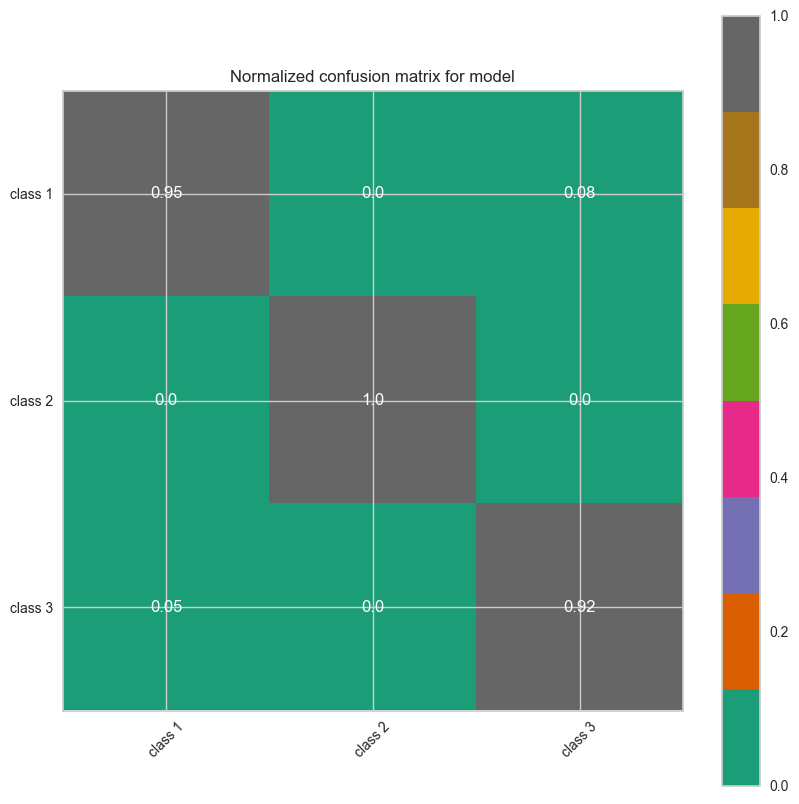

In [35]:
confusion_matrix_plot(cm_knn)

In [36]:
print("Classification Report:\n", classification_report(y_test, ypred1 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       0.95      0.90      0.92       257
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.92      0.96      0.94       306

    accuracy                           0.95       750
   macro avg       0.96      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



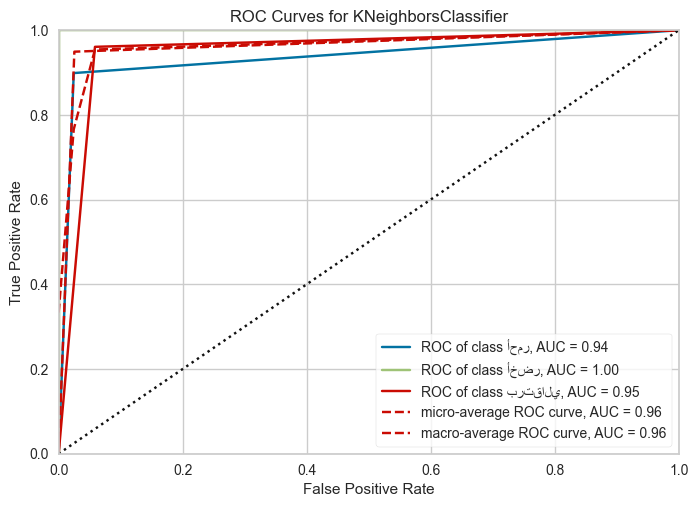

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=1))

In [37]:
plot_ROC_curve(knn2, x_train, y_train, x_test, y_test)

In [38]:
knn_score = table_score(ypred1)
knn_score.insert(0, 'Model', 'KNN')
knn_score


,Model,Recall,Precision,F1 Score,Accuracy
0,KNN,0.953206,0.956456,0.954432,0.949333


### logistic regresion model

In [39]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train, y_train)
print("Test score: {:.2f}".format(lr.score(x_test , y_test)))

Test score: 0.99


In [40]:
param_grid_lr = { 
    'multi_class': ['auto' , 'ovr'] ,
    'solver': ['lbfgs' , 'liblinear'], 
    'C': [1, 2 , 4]
}
clf_lr = GridSearchCV(estimator= LogisticRegression() , param_grid= param_grid_lr , cv=kfold, scoring='accuracy', verbose=3)
clf_lr.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.983 total time=   0.1s
[CV 2/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.1s
[CV 3/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 4/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.1s
[CV 5/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 6/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 7/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.977 total time=   0.0s
[CV 8/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.994 total time=   0.0s
[CV 9/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.989 total time=   0.0s
[CV 10/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.994 total time=   0.0s
[CV 1/10] END C=1, multi_class=auto, solver=liblinear;, score=0.897 total time=   0.0s
[CV 2/10] END C=1, 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4], 'multi_class': ['auto', 'ovr'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=3)

In [41]:
print("Best of Hyper Parameter :" , clf_lr.best_params_, "\nScore : " , clf_lr.best_score_)

Best of Hyper Parameter : {'C': 4, 'multi_class': 'auto', 'solver': 'lbfgs'} 
Score :  0.9891428571428571


In [42]:
lr2 = clf_lr.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(lr2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(lr2.score(x_train, y_train)))

Test score for test_data: 0.98
Test score for train_data: 0.99


In [43]:
scores_clf2 = cross_val_score(lr2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf2)
print("Mean for k_fold cross validation for Logistic Regression model", np.mean(scores_clf2))

[0.98285714 0.98857143 0.98857143 0.98857143 0.98857143 0.98857143
 0.97714286 0.99428571 1.         0.99428571]
Mean for k_fold cross validation for Logistic Regression model 0.9891428571428571


In [44]:
ypred2 = lr2.predict(x_test)
cm_lr = confusion_matrix(y_test, ypred2)
print("confusion_matrix(ytest, ypred): \n", cm_lr)

confusion_matrix(ytest, ypred): 
 [[253   0   4]
 [  0 185   2]
 [  4   2 300]]


In [45]:
sensitivity_specificity(cm_lr)

Sensitivity for each class: [0.9844357976653697, 0.9893048128342246, 0.9803921568627451]
Specificity for each class: [0.9918864097363083, 0.9964476021314387, 0.9864864864864865]
Sensitivity for each class:  0  is 0.9844357976653697
Specificity for each class: 0  is 0.9918864097363083
Sensitivity for each class:  1  is 0.9893048128342246
Specificity for each class: 1  is 0.9964476021314387
Sensitivity for each class:  2  is 0.9803921568627451
Specificity for each class: 2  is 0.9864864864864865


In [46]:
print("Classification Report:\n", classification_report(y_test, ypred2 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       0.98      0.98      0.98       257
        أخضر       0.99      0.99      0.99       187
     برتقالي       0.98      0.98      0.98       306

    accuracy                           0.98       750
   macro avg       0.98      0.98      0.98       750
weighted avg       0.98      0.98      0.98       750



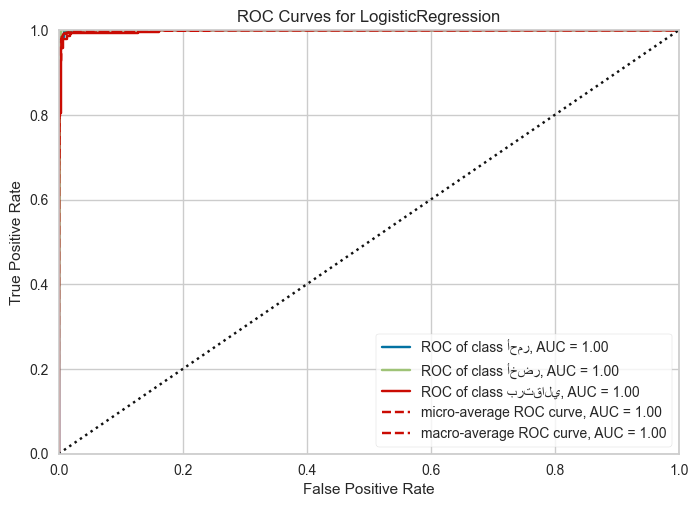

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=LogisticRegression(C=4))

In [47]:
plot_ROC_curve(lr2, x_train, y_train, x_test, y_test)

In [48]:
lr_score = table_score(ypred2)
lr_score.insert(0, 'Model', 'LR')
lr_score

,Model,Recall,Precision,F1 Score,Accuracy
0,LR,0.984711,0.984711,0.984711,0.984


### SVM model

In [49]:
svm = SVC(decision_function_shape='ovo')
svm.fit(x_train , y_train)
print("Test score: {:.2f}".format(svm.score(x_test , y_test)))

Test score: 0.98


In [50]:
param_grid_svm = { 
    'decision_function_shape': ['ovo' , 'ovr'],
    'kernel': ['rbf' , 'poly'], 
    'C': [1, 2 , 4 , 6]
}
clf_svm = GridSearchCV(estimator= SVC() , param_grid= param_grid_svm , cv=kfold, scoring='accuracy', verbose=3)
clf_svm.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.954 total time=   0.0s
[CV 2/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.983 total time=   0.0s
[CV 3/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.949 total time=   0.0s
[CV 4/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.977 total time=   0.0s
[CV 5/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.989 total time=   0.0s
[CV 6/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.971 total time=   0.0s
[CV 7/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.954 total time=   0.0s
[CV 8/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.977 total time=   0.0s
[CV 9/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.971 total time=   0.0s
[CV 10/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.977 total time=   0.0s
[CV 1/10] END C=

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 2, 4, 6],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [51]:
print("Best of Hyper Parameter :" , clf_svm.best_params_, "\nScore : " , clf_svm.best_score_)

Best of Hyper Parameter : {'C': 6, 'decision_function_shape': 'ovo', 'kernel': 'poly'} 
Score :  0.992


In [52]:
svm2 = clf_svm.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(svm2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(svm2.score(x_train, y_train)))

Test score for test_data: 1.00
Test score for train_data: 1.00


In [53]:
scores_clf3 = cross_val_score(svm2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf3)
print("Mean for k_fold cross validation for SVM model", np.mean(scores_clf3))

[0.98857143 0.98857143 0.98857143 0.98857143 0.98857143 0.99428571
 1.         0.99428571 1.         0.98857143]
Mean for k_fold cross validation for SVM model 0.992


In [54]:
ypred3 = svm2.predict(x_test)
cm_svm = confusion_matrix(y_test, ypred3)
print("confusion_matrix(ytest, ypred): \n", cm_svm)

confusion_matrix(ytest, ypred): 
 [[255   0   2]
 [  0 187   0]
 [  1   0 305]]


In [55]:
sensitivity_specificity(cm_svm)

Sensitivity for each class: [0.9922178988326849, 1.0, 0.9967320261437909]
Specificity for each class: [0.9979716024340771, 1.0, 0.9954954954954955]
Sensitivity for each class:  0  is 0.9922178988326849
Specificity for each class: 0  is 0.9979716024340771
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 0.9967320261437909
Specificity for each class: 2  is 0.9954954954954955


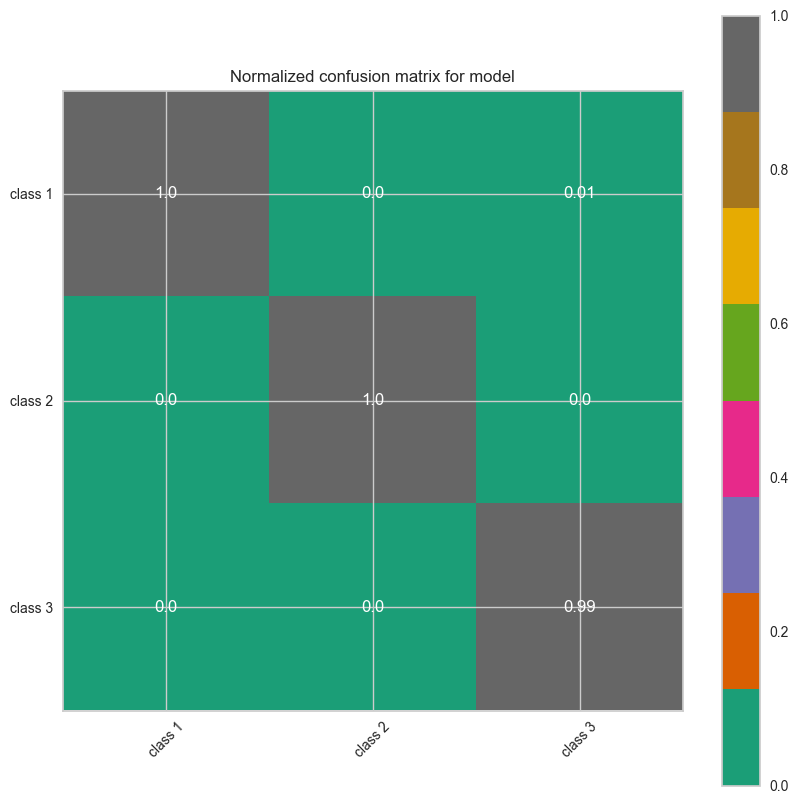

In [56]:
confusion_matrix_plot(cm_svm)

In [57]:
print("Classification Report:\n", classification_report(y_test, ypred3 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.99      0.99       257
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.99      1.00      1.00       306

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



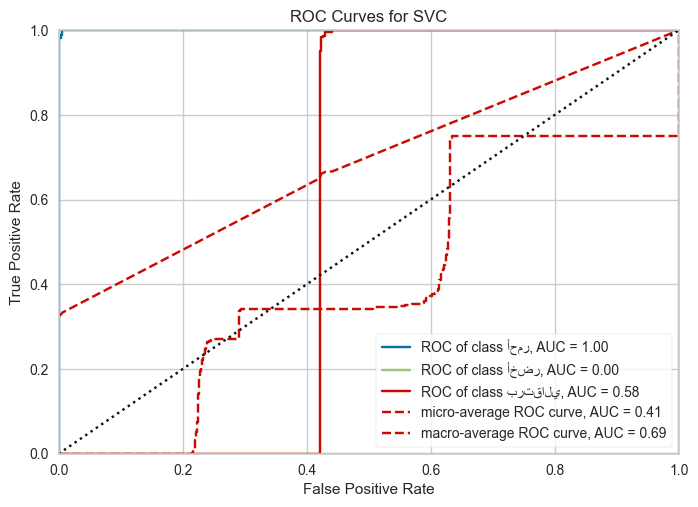

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=SVC(C=6, decision_function_shape='ovo', kernel='poly'))

In [58]:
plot_ROC_curve(svm2, x_train, y_train, x_test, y_test)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [59]:
svm_score = table_score(ypred3)
svm_score.insert(0, 'Model', 'SVM')
svm_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM,0.996317,0.996526,0.996419,0.996


### Random forest model

In [60]:
RF = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2) #criterion can be also : entropy 
RF.fit(x_train, y_train)
print("Test score: {:.2f}".format(RF.score(x_test , y_test)))

Test score: 0.93


In [61]:
param_grid_RF = { 
    'criterion': ['gini' , 'entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [2 , 4 , 8]
}
clf_RF = GridSearchCV(estimator= RandomForestClassifier() , param_grid= param_grid_RF , cv=kfold, scoring='accuracy', verbose=3)
clf_RF.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.897 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.931 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.903 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.949 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.926 total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.891 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.920 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.931 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.909 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.920 total time=   0.1s
[CV 1/

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [62]:
print("Best of Hyper Parameter :" , clf_RF.best_params_, "\nScore : " , clf_RF.best_score_)

Best of Hyper Parameter : {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 200} 
Score :  0.9422857142857142


In [63]:
RF2 = clf_RF.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(RF2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(RF2.score(x_train, y_train)))

Test score for test_data: 0.95
Test score for train_data: 0.98


In [64]:
scores_clf4 = cross_val_score(RF2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf4)
print("Mean for k_fold cross validation for Random Forest model", np.mean(scores_clf4))

[0.91428571 0.95428571 0.93714286 0.94857143 0.96571429 0.92571429
 0.91428571 0.95428571 0.94857143 0.94285714]
Mean for k_fold cross validation for Random Forest model 0.9405714285714286


In [65]:
ypred4 = RF2.predict(x_test)
cm_rf = confusion_matrix(y_test, ypred4)
print("confusion_matrix(ytest, ypred): \n", cm_rf)

confusion_matrix(ytest, ypred): 
 [[219   0  38]
 [  0 187   0]
 [  1   0 305]]


In [66]:
sensitivity_specificity(cm_rf)

Sensitivity for each class: [0.8521400778210116, 1.0, 0.9967320261437909]
Specificity for each class: [0.9979716024340771, 1.0, 0.9144144144144144]
Sensitivity for each class:  0  is 0.8521400778210116
Specificity for each class: 0  is 0.9979716024340771
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 0.9967320261437909
Specificity for each class: 2  is 0.9144144144144144


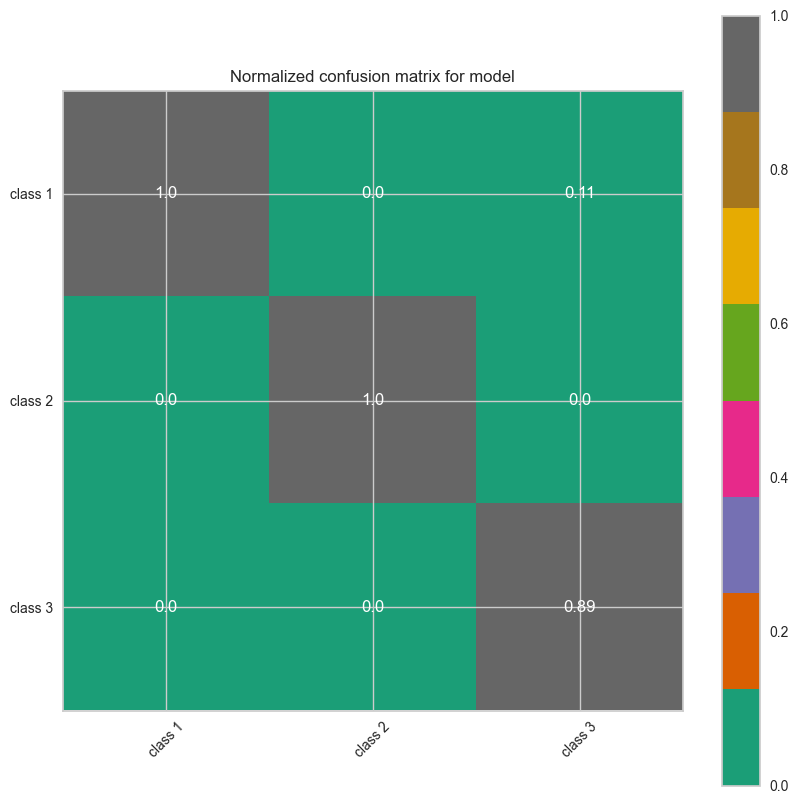

In [67]:
confusion_matrix_plot(cm_rf)

In [68]:
print("Classification Report:\n", classification_report(y_test, ypred4, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.85      0.92       257
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.89      1.00      0.94       306

    accuracy                           0.95       750
   macro avg       0.96      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



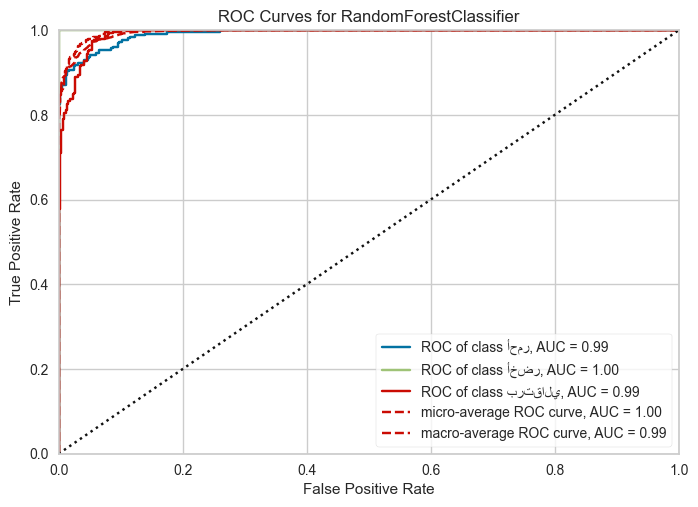

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=RandomForestClassifier(criterion='entropy', max_depth=8,
                                        n_estimators=200))

In [69]:
plot_ROC_curve(RF2, x_train, y_train, x_test, y_test)

In [70]:
rf_score = table_score(ypred4)
rf_score.insert(0, 'Model', 'RF')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy
0,RF,0.949624,0.961556,0.952716,0.948


### Naive Bayes

In [71]:
NB = GaussianNB()
NB.fit(x_train, y_train)
print("Test score: {:.2f}".format(NB.score(x_test , y_test)))

Test score: 0.93


In [72]:
param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}
clf_NB = GridSearchCV(estimator= GaussianNB() , param_grid= param_grid_NB , cv=kfold, scoring='accuracy', verbose=3)
clf_NB.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............var_smoothing=1e-09;, score=0.891 total time=   0.0s
[CV 2/10] END ..............var_smoothing=1e-09;, score=0.931 total time=   0.0s
[CV 3/10] END ..............var_smoothing=1e-09;, score=0.909 total time=   0.0s
[CV 4/10] END ..............var_smoothing=1e-09;, score=0.949 total time=   0.0s
[CV 5/10] END ..............var_smoothing=1e-09;, score=0.926 total time=   0.0s
[CV 6/10] END ..............var_smoothing=1e-09;, score=0.891 total time=   0.0s
[CV 7/10] END ..............var_smoothing=1e-09;, score=0.920 total time=   0.0s
[CV 8/10] END ..............var_smoothing=1e-09;, score=0.931 total time=   0.0s
[CV 9/10] END ..............var_smoothing=1e-09;, score=0.914 total time=   0.0s
[CV 10/10] END .............var_smoothing=1e-09;, score=0.920 total time=   0.0s
[CV 1/10] END ..............var_smoothing=1e-08;, score=0.891 total time=   0.0s
[CV 2/10] END ..............var_smoothing=1e-08;

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=3)

In [73]:
print("Best of Hyper Parameter :" , clf_NB.best_params_, "\nScore : " , clf_NB.best_score_)

Best of Hyper Parameter : {'var_smoothing': 1e-09} 
Score :  0.9182857142857144


In [74]:
NB2 = clf_NB.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(NB2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(NB2.score(x_train, y_train)))

Test score for test_data: 0.93
Test score for train_data: 0.92


In [75]:
scores_clf5 = cross_val_score(NB2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf5)
print("Mean for k_fold cross validation for Naive Bayes model", np.mean(scores_clf5))

[0.89142857 0.93142857 0.90857143 0.94857143 0.92571429 0.89142857
 0.92       0.93142857 0.91428571 0.92      ]
Mean for k_fold cross validation for Naive Bayes model 0.9182857142857144


In [76]:
ypred5 = NB2.predict(x_test)
cm_NB = confusion_matrix(y_test, ypred5)
print("confusion_matrix(ytest, ypred): \n", cm_NB)

confusion_matrix(ytest, ypred): 
 [[204   0  53]
 [  0 187   0]
 [  0   0 306]]


In [77]:
sensitivity_specificity(cm_NB)

Sensitivity for each class: [0.7937743190661478, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 0.8806306306306306]
Sensitivity for each class:  0  is 0.7937743190661478
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 0.8806306306306306


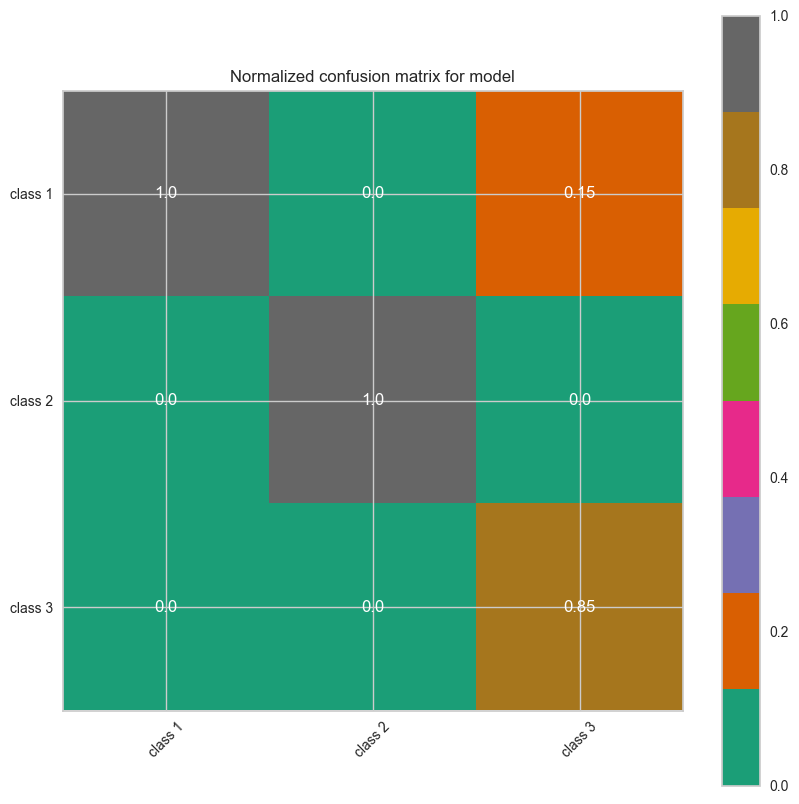

In [78]:
confusion_matrix_plot(cm_NB)

In [79]:
print("Classification Report:\n", classification_report(y_test, ypred5, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.79      0.89       257
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.85      1.00      0.92       306

    accuracy                           0.93       750
   macro avg       0.95      0.93      0.94       750
weighted avg       0.94      0.93      0.93       750



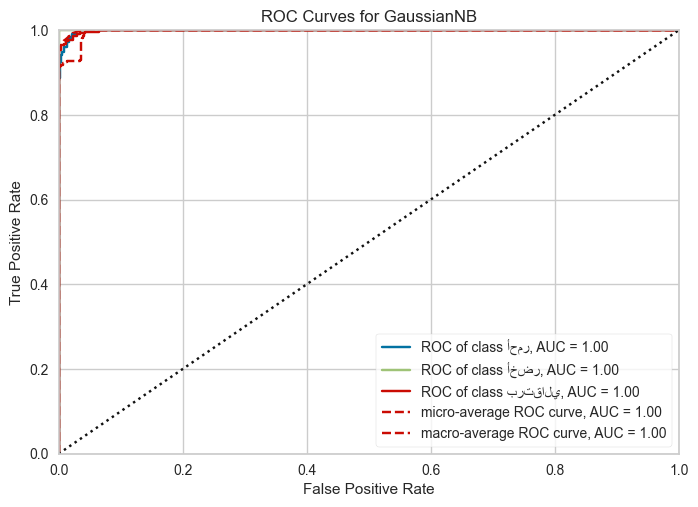

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=GaussianNB())

In [80]:
plot_ROC_curve(NB2, x_train, y_train, x_test, y_test)

In [81]:
nb_score = table_score(ypred5)
nb_score.insert(0, 'Model', 'NB')
nb_score

,Model,Recall,Precision,F1 Score,Accuracy
0,NB,0.931258,0.950789,0.935111,0.929333


### NN model

In [82]:
MLP = MLPClassifier(activation='tanh',solver='sgd', hidden_layer_sizes=(5,), max_iter=5000, random_state=1)
MLP.fit(x_train,y_train)
print("Test score: {:.2f}".format(MLP.score(x_test, y_test)))

Test score: 0.41


In [83]:
param_grid_MLP = {
    'learning_rate_init': [0.001 , 0.01], 
    'batch_size': [1]
    # 'hidden_layer_sizes': [(20,), (50, 50)],
    # 'activation': ['relu', 'tanh'],
    # 'alpha': [0.0001, 0.01],
}
clf_MLP = GridSearchCV(estimator=MLPClassifier(), param_grid= param_grid_MLP , cv=kfold, scoring='accuracy' , verbose=3)
clf_MLP.fit(x_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END batch_size=1, learning_rate_init=0.001;, score=0.943 total time=  42.0s
[CV 2/10] END batch_size=1, learning_rate_init=0.001;, score=0.931 total time=  55.0s
[CV 3/10] END batch_size=1, learning_rate_init=0.001;, score=0.920 total time=  36.8s
[CV 4/10] END batch_size=1, learning_rate_init=0.001;, score=0.943 total time=  32.0s
[CV 5/10] END batch_size=1, learning_rate_init=0.001;, score=0.931 total time=  46.4s
[CV 6/10] END batch_size=1, learning_rate_init=0.001;, score=0.954 total time=  50.1s
[CV 7/10] END batch_size=1, learning_rate_init=0.001;, score=0.920 total time=  27.0s
[CV 8/10] END batch_size=1, learning_rate_init=0.001;, score=0.931 total time=  28.1s
[CV 9/10] END batch_size=1, learning_rate_init=0.001;, score=0.909 total time= 1.1min
[CV 10/10] END batch_size=1, learning_rate_init=0.001;, score=0.937 total time=  49.5s
[CV 1/10] END batch_size=1, learning_rate_init=0.01;, score=0.857 total time= 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'batch_size': [1],
                         'learning_rate_init': [0.001, 0.01]},
             scoring='accuracy', verbose=3)

In [84]:
print("Best of Hyper Parameter :" , clf_MLP.best_params_, "\nScore : " , clf_MLP.best_score_)

Best of Hyper Parameter : {'batch_size': 1, 'learning_rate_init': 0.001} 
Score :  0.932


In [85]:
MLP2 = clf_MLP.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(MLP2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(MLP2.score(x_train, y_train)))

Test score for test_data: 0.93
Test score for train_data: 0.93


In [86]:
scores_clf6 = cross_val_score(MLP2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf6)
print("Mean for k_fold cross validation for Neural Network model", np.mean(scores_clf6))

[0.89142857 0.93142857 0.89714286 0.92       0.93714286 0.89714286
 0.92       0.93714286 0.92       0.92      ]
Mean for k_fold cross validation for Neural Network model 0.917142857142857


In [87]:
ypred6 = MLP2.predict(x_test)
cm_MLP = confusion_matrix(y_test, ypred6)
print("confusion_matrix(ytest, ypred): \n", cm_MLP)

confusion_matrix(ytest, ypred): 
 [[209   0  48]
 [  0 187   0]
 [  4   0 302]]


In [88]:
sensitivity_specificity(cm_MLP)

Sensitivity for each class: [0.8132295719844358, 1.0, 0.9869281045751634]
Specificity for each class: [0.9918864097363083, 1.0, 0.8918918918918919]
Sensitivity for each class:  0  is 0.8132295719844358
Specificity for each class: 0  is 0.9918864097363083
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 0.9869281045751634
Specificity for each class: 2  is 0.8918918918918919


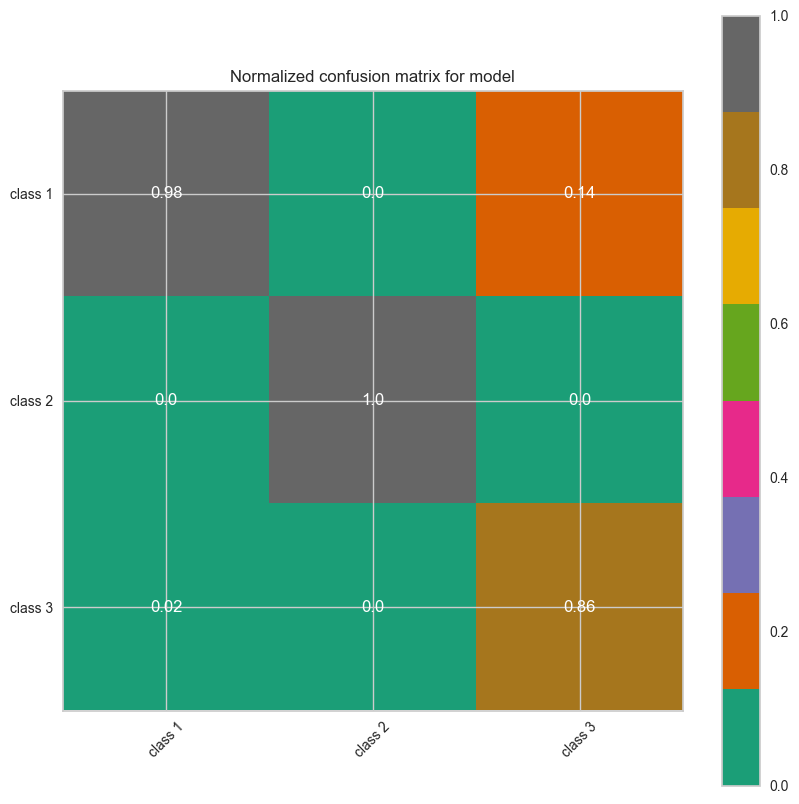

In [89]:
confusion_matrix_plot(cm_MLP)

In [90]:
print("Classification Report:\n", classification_report(y_test, ypred6, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       0.98      0.81      0.89       257
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.86      0.99      0.92       306

    accuracy                           0.93       750
   macro avg       0.95      0.93      0.94       750
weighted avg       0.94      0.93      0.93       750



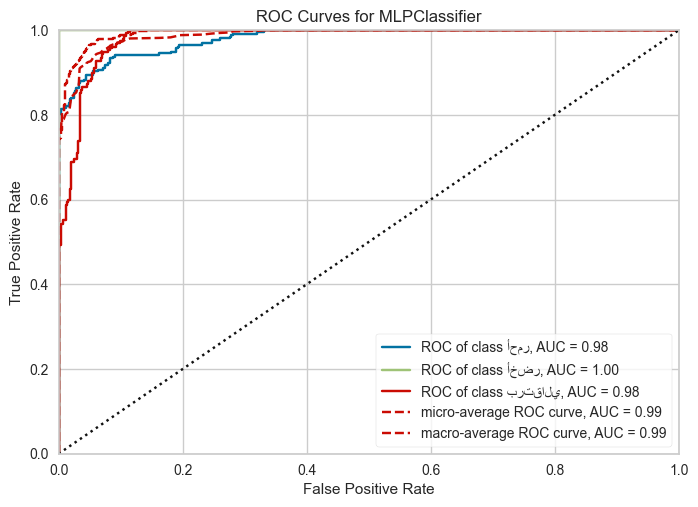

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=MLPClassifier(batch_size=1))

In [91]:
plot_ROC_curve(MLP2, x_train, y_train, x_test, y_test)

In [92]:
nn_score = table_score(ypred6)
nn_score.insert(0, 'Model', 'NN')
nn_score

,Model,Recall,Precision,F1 Score,Accuracy
0,NN,0.933386,0.948026,0.936698,0.930667


### comparison

In [93]:
predictions = pd.concat([knn_score, lr_score, svm_score, rf_score, nb_score, nn_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Accuracy'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy
2,SVM,0.996317,0.996526,0.996419,0.996000
1,LR,0.984711,0.984711,0.984711,0.984000
0,KNN,0.953206,0.956456,0.954432,0.949333
3,RF,0.949624,0.961556,0.952716,0.948000
5,NN,0.933386,0.948026,0.936698,0.930667
4,NB,0.931258,0.950789,0.935111,0.929333


### visualization

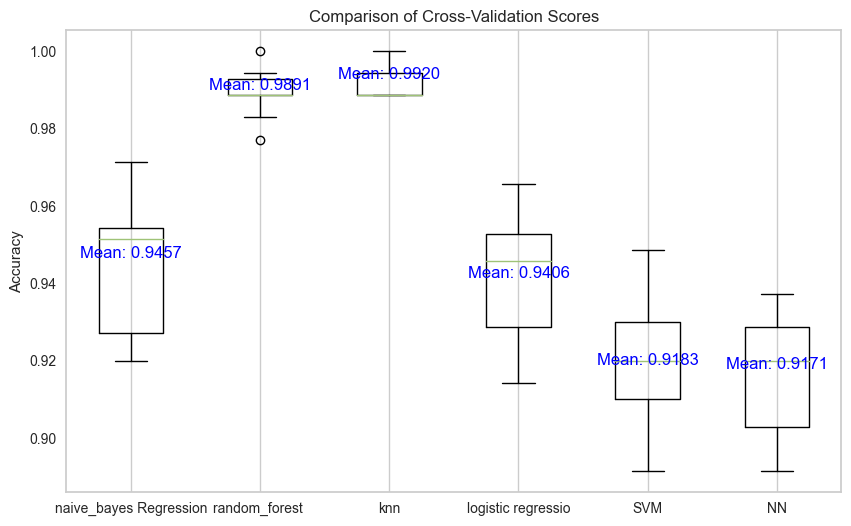

In [94]:
labels = ['naive_bayes Regression', 'random_forest ','knn','logistic regressio','SVM','NN']
data = [scores_clf1, scores_clf2,scores_clf3,scores_clf4,scores_clf5,scores_clf6]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 7), labels)
plt.grid(axis='y')

# Calculate and display mean scores
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2),np.mean(scores_clf3),np.mean(scores_clf4),np.mean(scores_clf5),np.mean(scores_clf6)]
for i, mean in enumerate(mean_scores, 1):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()

### :
x_pred = pd.read_excel("data_for_test_model_by_dr_yasser.xlsx")
for i in x_pred.columns:
    x_pred[i] = x_pred[i].apply(eval)

mean_values_per_feature_x_pred = x_pred.apply(lambda row: [np.mean(row[i]) for i in x_pred.columns], axis=1)

x_pred = pd.DataFrame(mean_values_per_feature_x_pred.tolist(), columns=x_pred.columns,index=x_pred.index)
x_pred['متوسط'] = x_pred.apply(lambda row: np.mean(row), axis=1)

print("Original DataFrame:")
print(x_pred)# ***********************************
x_pred=x_pred.iloc[0,:]
ypred1 = knn2.predict(x_pred) 
print(ypred1)
ypred2 = lr2.predict(x_pred)
print(ypred2)
ypred3 = svm2.predict(x_pred)
print(ypred3)
ypred4 = RF2.predict(x_pred)
print(ypred4)
ypred5 = NB2.predict(x_pred)
print(ypred5)
ypred6 = MLP2.predict(x_pred)
print(ypred6)



In [95]:
pred_scale = pd.read_excel("Stu-Evaluation.xlsx")
pred_scale

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,النتيجة الفعلية
0,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,30,20,30,50,30]","[0,0,0,0,0,0,0,60,60]","[0,0,0,0,0,30,30,30,30]",1
1,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,20,30,20,50,20]","[0,0,0,0,0,0,0,0,5]","[0,0,0,0,0,30,30,30,30]",1
2,"[0,50,0,0,0,0,0,0]","[25,0,50,0,50,0,0,80]","[25,0,0,25,50,0,0,0]","[0,0,0,50,80,0,0,50]","[0,0,0,0,80,0,0,0]","[0,0,0,0,80,0,0,0]","[0,10,0,0,0,60,0,80]","[0,0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,10]",3
3,"[0,0,0,0,0,1]","[15,0,25,0,0,0]","[0,0,0,0,0,1]","[0,0,0,50,80,50]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]",3
4,"[25,0,0,70,90,0]","[0,0,0,0,0,1]","[0,25,50,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,50,80,70]","[0,0,0,0,0,1]",3
5,"[0,0,0,1]","[0,0,0,1]","[25,50,0,0]","[0,0,80,0]","[0,0,0,1]","[0,0,0,1]","[0,0,0,70]","[0,0,0,1]","[0,0,0,1]",3
6,"[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[50,0,0]","[0,0,1]","[0,0,1]",3
7,"[0,100,100,100,100,100,100,100]","[0,0,0,100,100,80,70,80]","[0,0,0,0,0,0,70,100]","[0,0,0,0,0,0,0,80]","[0,0,0,0,0,0,0,90]","[0,0,0,0,0,0,0,10]","[0,0,50,20,50,50,50,70]","[0,0,50,20,50,50,50,70]","[0,0,0,0,0,0,80,100]",2
8,"[0,100,100,100,100,100,100,100]","[0,0,0,100,100,80,70,80]","[0,0,0,0,0,0,70,100]","[0,0,0,0,0,0,0,80]","[0,0,0,0,0,0,0,10]","[0,0,0,0,0,0,0,10]","[0,0,50,20,50,50,50,70]","[0,0,50,20,50,50,50,70]","[0,0,0,0,0,0,80,20]",2
9,"[0,100,100,100,100,100]","[0,40,80,100,100,100]","[0,40,100,100,100,100]","[0,0,100,100,100,100]","[0,0,100,100,100,100]","[0,0,100,100,100,100]","[0,0,0,60,100,100]","[0,0,0,0,0,60]","[0,0,0,100,100,100]",1


In [96]:
pred_scale['تصنيف']=1
for i in range(pred_scale['تصنيف'].count()):
    if pred_scale.iloc[i,9]==3:
        pred_scale.iloc[i,10]="أحمر"
    elif pred_scale.iloc[i,9]==2:
        pred_scale.iloc[i,10]="برتقالي"
    elif pred_scale.iloc[i,9]==1:
        pred_scale.iloc[i,10]="أخضر"

pred_scale

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,النتيجة الفعلية,تصنيف
0,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,30,20,30,50,30]","[0,0,0,0,0,0,0,60,60]","[0,0,0,0,0,30,30,30,30]",1,أخضر
1,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,20,30,20,50,20]","[0,0,0,0,0,0,0,0,5]","[0,0,0,0,0,30,30,30,30]",1,أخضر
2,"[0,50,0,0,0,0,0,0]","[25,0,50,0,50,0,0,80]","[25,0,0,25,50,0,0,0]","[0,0,0,50,80,0,0,50]","[0,0,0,0,80,0,0,0]","[0,0,0,0,80,0,0,0]","[0,10,0,0,0,60,0,80]","[0,0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,10]",3,أحمر
3,"[0,0,0,0,0,1]","[15,0,25,0,0,0]","[0,0,0,0,0,1]","[0,0,0,50,80,50]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]",3,أحمر
4,"[25,0,0,70,90,0]","[0,0,0,0,0,1]","[0,25,50,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,50,80,70]","[0,0,0,0,0,1]",3,أحمر
5,"[0,0,0,1]","[0,0,0,1]","[25,50,0,0]","[0,0,80,0]","[0,0,0,1]","[0,0,0,1]","[0,0,0,70]","[0,0,0,1]","[0,0,0,1]",3,أحمر
6,"[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[0,0,1]","[50,0,0]","[0,0,1]","[0,0,1]",3,أحمر
7,"[0,100,100,100,100,100,100,100]","[0,0,0,100,100,80,70,80]","[0,0,0,0,0,0,70,100]","[0,0,0,0,0,0,0,80]","[0,0,0,0,0,0,0,90]","[0,0,0,0,0,0,0,10]","[0,0,50,20,50,50,50,70]","[0,0,50,20,50,50,50,70]","[0,0,0,0,0,0,80,100]",2,برتقالي
8,"[0,100,100,100,100,100,100,100]","[0,0,0,100,100,80,70,80]","[0,0,0,0,0,0,70,100]","[0,0,0,0,0,0,0,80]","[0,0,0,0,0,0,0,10]","[0,0,0,0,0,0,0,10]","[0,0,50,20,50,50,50,70]","[0,0,50,20,50,50,50,70]","[0,0,0,0,0,0,80,20]",2,برتقالي
9,"[0,100,100,100,100,100]","[0,40,80,100,100,100]","[0,40,100,100,100,100]","[0,0,100,100,100,100]","[0,0,100,100,100,100]","[0,0,100,100,100,100]","[0,0,0,60,100,100]","[0,0,0,0,0,60]","[0,0,0,100,100,100]",1,أخضر


In [97]:
x_pred_scale=pred_scale.drop(['تصنيف','النتيجة الفعلية'],axis=1)
y_pred_scale=pred_scale['تصنيف']

In [98]:
for i in x_pred_scale.columns:
    x_pred_scale[i] = x_pred_scale[i].apply(eval)

In [99]:
for row_index in range(len(x_pred_scale)):
    for col_index in range(len(x_pred_scale.columns)):
        value = x_pred_scale.iloc[row_index, col_index]
        sum_prod, count = 1, 0
        for i in range(len(value)):
            if value[i] != 0:
                sum_prod *= value[i]
                count += 1
        if count != 0:
            x_pred_scale.iloc[row_index, col_index] = np.ceil(np.power(sum_prod, 1/count))
        else:
            x_pred_scale.iloc[row_index, col_index] = 0
pred_scale.head()


,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,النتيجة الفعلية,تصنيف
0,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,30,20,30,50,30]","[0,0,0,0,0,0,0,60,60]","[0,0,0,0,0,30,30,30,30]",1,أخضر
1,"[5,40,90,90,90,90,90,90,90]","[0,20,60,30,90,90,90,90,90]","[0,0,10,20,60,90,90,90,90]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[0,0,0,0,0,30,30,30,30]","[50,50,50,50,20,30,20,50,20]","[0,0,0,0,0,0,0,0,5]","[0,0,0,0,0,30,30,30,30]",1,أخضر
2,"[0,50,0,0,0,0,0,0]","[25,0,50,0,50,0,0,80]","[25,0,0,25,50,0,0,0]","[0,0,0,50,80,0,0,50]","[0,0,0,0,80,0,0,0]","[0,0,0,0,80,0,0,0]","[0,10,0,0,0,60,0,80]","[0,0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,10]",3,أحمر
3,"[0,0,0,0,0,1]","[15,0,25,0,0,0]","[0,0,0,0,0,1]","[0,0,0,50,80,50]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]",3,أحمر
4,"[25,0,0,70,90,0]","[0,0,0,0,0,1]","[0,25,50,0,0,0]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,0,0,0,0,1]","[0,5,0,0,0,0]","[0,0,0,50,80,70]","[0,0,0,0,0,1]",3,أحمر


In [100]:
# **********************************************************************************************************
def table_score_2(ypred,y_pred_test=y_pred_scale):
    y_pred_test=y_pred_scale
    Recall = recall_score(y_pred_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_pred_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_pred_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_pred_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score
# **********************************************************************************************************

ypred_1_scale = knn2.predict(x_pred_scale) 
knn_score = table_score_2(ypred_1_scale)
knn_score.insert(0, 'Model', 'knn')

ypred_2_scale = lr2.predict(x_pred_scale) 
lr_score = table_score_2(ypred_2_scale)
lr_score.insert(0, 'Model', 'lr')

ypred_3_scale = svm2.predict(x_pred_scale) 
svm_score = table_score_2(ypred_3_scale)
svm_score.insert(0, 'Model', 'svm')

ypred_4_scale = RF2.predict(x_pred_scale) 
RF_score = table_score_2(ypred_4_scale)
RF_score.insert(0, 'Model', 'RF')

ypred_5_scale = NB2.predict(x_pred_scale) 
NB_score = table_score_2(ypred_5_scale)
NB_score.insert(0, 'Model', 'NB')

ypred_6_scale = MLP2.predict(x_pred_scale) 
NN_score = table_score_2(ypred_6_scale)
NN_score.insert(0, 'Model', 'NN')

# comparising table
predictions_for_test = pd.concat([knn_score, lr_score, svm_score, RF_score, NB_score, NN_score], ignore_index=True, sort=False)
predictions_for_test.sort_values(by=['Accuracy'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy
1,lr,0.888889,0.952381,0.907692,0.90
2,svm,0.888889,0.952381,0.907692,0.90
0,knn,0.555556,0.866667,0.538721,0.80
3,RF,0.527778,0.805861,0.498462,0.75
5,NN,0.555556,0.683333,0.502646,0.70
4,NB,0.388889,0.877193,0.353303,0.65


## Save Model

In [102]:
import joblib

filename = 'SVM_Model_Geometric.joblib'

In [103]:
joblib.dump(svm2, filename)

['SVM_Model_Geometric.joblib']